In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import animation, rc
from IPython.display import HTML, Image
import random

pd.set_option('display.float_format', '{:.2g}'.format)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Let's create data that follows the following equation:

$y = \beta_1X_1 + \beta_2X_2 + \epsilon$

Here is a function that creates our data

In [2]:
def create_data(num_samples,min_x1, min_x2, max_x1,max_x2,beta1,beta2,noise_var):
    x1 = np.random.uniform(min_x1,max_x1,num_samples)
    x2 = np.random.uniform(min_x2,max_x2,num_samples)
    noise = np.random.normal(0,noise_var,num_samples)

    y = beta1*x1 + beta2*x2 + noise

    X = np.array([x1,x2]).T
    
    return X, y, x1, x2

In [3]:
def grad_desc(learn_rate, num_iter, beta_init, X, low_thres = 0):

    ## Initialization steps
    beta = beta_init
    beta_path = np.zeros((num_iter+1,2))
    beta_path[0,:]= beta_init

    loss_vec = np.zeros(num_iter)

    ## Main Gradient Descent loop (for a fixed number of iterations)
    for i in range(num_iter):
        y_pred = np.dot(beta.T,X.T)
        loss_vec[i] = np.sum((y-y_pred)**2)
        grad_vec = (y-y_pred).dot(X)/num_samples  #sum up the gradients across all observations and divide by num_samples
        beta = beta + learn_rate*grad_vec
        beta_path[i+1, :]=beta
        
        # quick check to stop early if the loss is below a threshold
        if loss_vec[i]<=low_thres:
            return beta_path, loss_vec        
        
    return beta_path, loss_vec

In [ ]:
# def plot_ij(beta_path, i, j, ax, true_coef):
#     ax.plot(true_coef[i], true_coef[j],
#             marker='p', markersize=15, label='true coef', color='#778899')
#     ax.plot(beta_path[:, i],beta_path[:, j],
#             color='k', linestyle='--', marker='^', markersize=5, markevery=50)
#     ax.plot(beta_path[0, i], beta_path[0, j], marker='d', markersize=15, label='start', color='#F08080')
#     ax.plot(beta_path[-1, i], beta_path[-1, j], marker='o', markersize=15, label='finish', color='#F08080')
#     ax.set(
#         xlabel='beta'+str(i),
#         ylabel='beta'+str(j))
#     ax.axis('equal')
#     ax.grid(True)
#     ax.legend(loc='best')

In [ ]:
# def plot_all(beta_path, loss_vec, learn_rate, num_iter, beta_init, true_coef, gdtype='Gradient Descent'):
#     fig = plt.figure(figsize=(16, 8))
#     title = '{gdtype} in the 3d parameter space - Learning rate is {lr} // {iters} iters // starting point {initial}'
#     title = title.format(gdtype=gdtype, lr=learn_rate, iters=num_iter, initial=beta_init)
#     fig.suptitle(title, fontsize=20)
#     ax = fig.add_subplot(1, 2, 1)
#     plot_ij(beta_path, 0, 1, ax, true_coef)
# #     ax = fig.add_subplot(2, 2, 2)
# #     plot_ij(beta_path, 0, 2, ax)
# #     ax = fig.add_subplot(2, 2, 3)
# #     plot_ij(beta_path, 1, 2, ax)
#     ax = fig.add_subplot(1, 2, 2)
#     ax.semilogy(loss_vec)
#     print(min(loss_vec))
#     ax.set(xlabel='iterations', ylabel='squared loss')
#     ax.grid(True)

### Initialize the data

In [4]:
beta1 = 10
beta2 = 0.1
min_x1 = -0.1
max_x1 = 0.1
min_x2 = -10
max_x2 = 10
num_samples = 1000
noise_var = .5
true_coef = [beta1, beta2]
X, y, x1, x2 = create_data(num_samples,min_x1, min_x2, max_x1,max_x2,beta1,beta2,noise_var)

### Gets the normalized data

In [10]:
scaler = StandardScaler()
x1_norm = scaler.fit_transform(x1.reshape(1, -1).T)
x1_norm = x1_norm[:,0]
true_coef_norm = np.copy(true_coef)
true_coef_norm[0] = true_coef[0]*scaler.scale_

x2_norm = scaler.fit_transform(x2.reshape(1, -1).T)
x2_norm = x2_norm[:,0]
true_coef_norm[1] = true_coef[1]*scaler.scale_

print(true_coef,true_coef_norm)

X_norm = np.array([x1_norm,x2_norm]).T

[10, 0.1] [ 0.56739172  0.58470917]


### Plot the original data

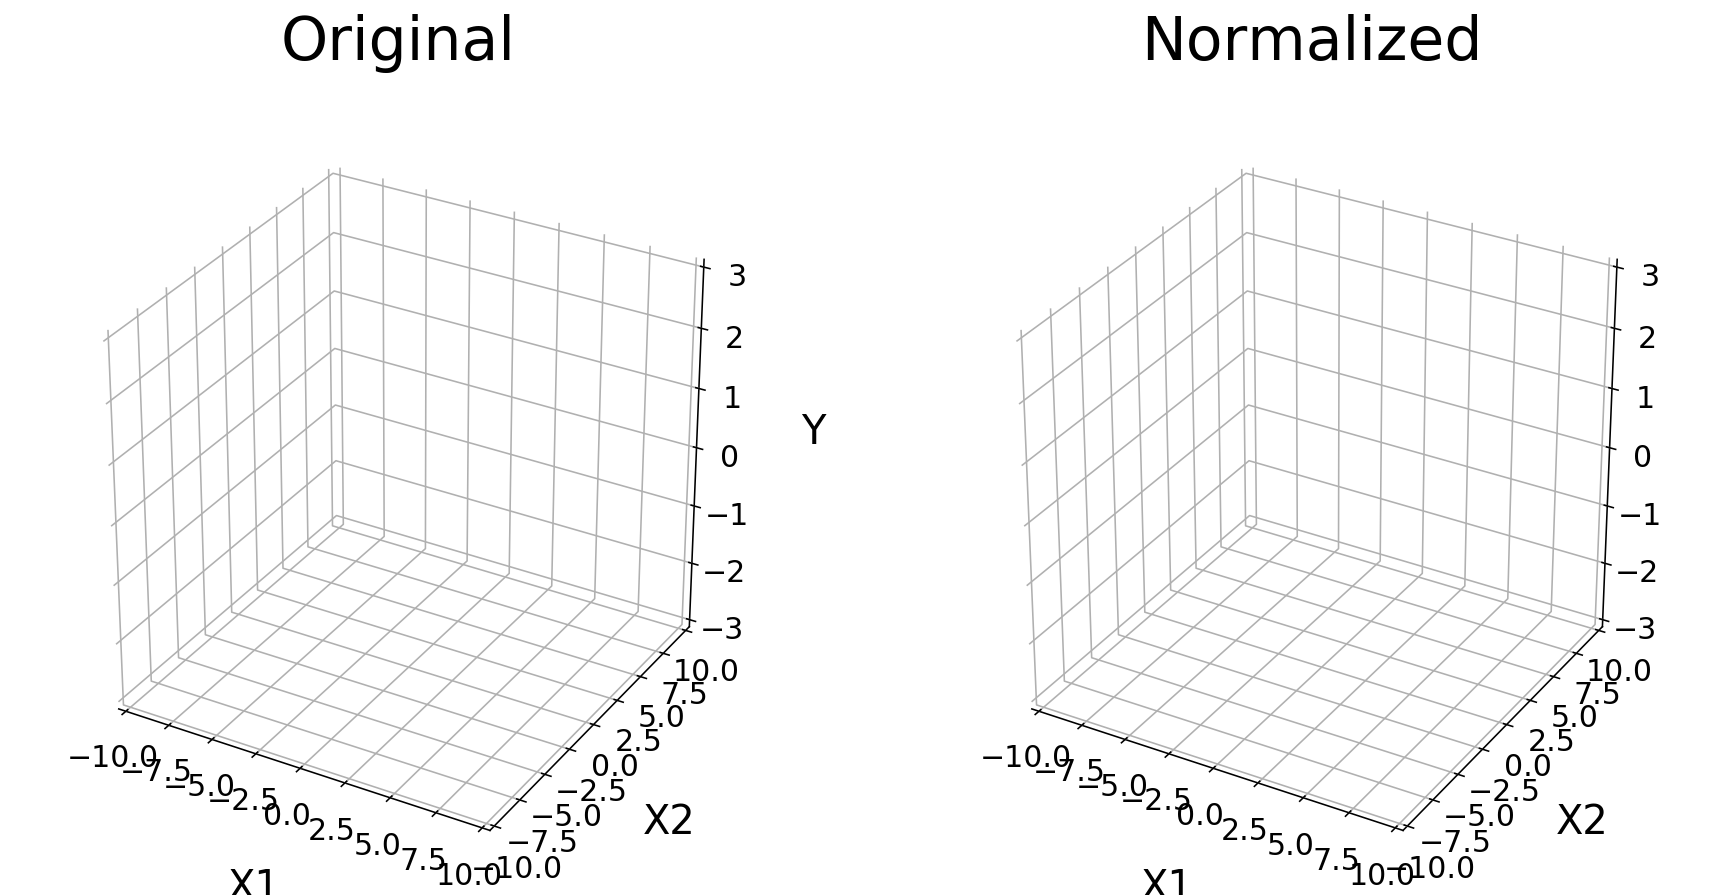

In [5]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

rc('animation', html='html5') 

fig = plt.figure(figsize=[15,7])
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')


ax1.set_xlim((np.round(min(x2)), np.round(max(x2))))
ax1.set_ylim((np.round(min(x2)), np.round(max(x2))))
ax1.set_zlim(np.round(min(y)), np.round(max(y)+.1))
ax1.set_title('Original', y=1.15,fontsize=30)
ax1.set_xlabel('X1',labelpad=20,fontsize=20)
ax1.set_ylabel('X2',labelpad=20,fontsize=20)
ax1.set_zlabel('Y',labelpad=20,fontsize=20)
ax1.w_xaxis.set_pane_color((1,1,1,1))
ax1.w_yaxis.set_pane_color((1,1,1,1))
ax1.w_zaxis.set_pane_color((1,1,1,1))

ax2.set_xlim((np.round(min(x2)),np.round(max(x2))))
ax2.set_ylim((np.round(min(x2)),np.round(max(x2))))
ax2.set_zlim((np.round(min(y)),np.round(max(y))))
ax2.set_title('Normalized', y=1.15,fontsize=30)
ax2.set_xlabel('X1',labelpad=20,fontsize=20)
ax2.set_ylabel('X2',labelpad=20,fontsize=20)
ax2.set_zlabel('Y',labelpad=20,fontsize=20)
ax2.w_xaxis.set_pane_color((1,1,1,1))
ax2.w_yaxis.set_pane_color((1,1,1,1))
ax2.w_zaxis.set_pane_color((1,1,1,1))

line1, = ax1.plot([], [], [],'.' ,lw=2)
line2, = ax2.plot([], [], [],'.' ,lw=2)


In [6]:
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return (line1,line2,)

In [7]:
# animation function. This is called sequentially
def animate(i):
    line1.set_data(X[:,0], X[:,1])
    line1.set_3d_properties(y)
    line1.set_color('red')
    line1.set_alpha(0.25)

    line1.axes.view_init((i)*4+45,25)
#     line1.axes.view_init(30,(i-1)*2+45)
    line1.axes.xaxis.set_label_text('$X_1$',fontdict={'size':25,'weight':'bold'})
    line1.axes.yaxis.set_label_text('$X_2$',fontdict={'size':25,'weight':'bold'})
    line1.axes.zaxis.set_label_text('$Y$',fontdict={'size':35,'weight':'bold'})

    line2.set_data(X_norm[:,0], X_norm[:,1])
    line2.set_3d_properties(y)
    line2.set_color('blue')

    line2.axes.view_init((i)*4+45,25)
    line2.axes.xaxis.set_label_text('$Norm X_1$',fontdict={'size':25,'weight':'bold'})
    line2.axes.yaxis.set_label_text('$Norm X_2$',fontdict={'size':25,'weight':'bold'})
    line2.axes.zaxis.set_label_text('$Y$',fontdict={'size':35,'weight':'bold'})
    line2.set_alpha(0.25)

    return (line1,line2,)

In [8]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=200, blit=True)

In [11]:
anim

In [12]:
anim.save('Origin_data.mp4')

brew install yasm

brew install ffmpeg

brew install imagemagick

In [14]:
from moviepy.editor import *

In [15]:
clip = VideoFileClip('Origin_data.mp4')
clip.write_gif('Origin_data.gif')


[MoviePy] Building file Origin_data.gif with imageio


 99%|█████████▉| 90/91 [00:06<00:00, 12.22it/s]


In [16]:
clip.preview()

ImportError: clip.preview requires Pygame installed

In [ ]:


learn_rate = 5e-2#5e-4#6.1e-6#4.6e-6
num_iter = 20000
beta_init = np.array([-10,-10])

beta_path1, loss_vec1 = grad_desc(learn_rate, num_iter, beta_init, X)
    
# plot_all(beta_path1, loss_vec1, learn_rate, num_iter, beta_init, true_coef)

Initializes the plot for 3D

In [ ]:
# Example 2
# beta1 = 2
# beta2 = 2
# min_x1 = -1
# max_x1 = 1
# min_x2 = -1
# max_x2 = 1
# num_samples = 1000
# noise_var = .5
# true_coef = [beta1, beta2]
# X, y, x1, x2 = create_data(num_samples,min_x1, min_x2, max_x1,max_x2,beta1,beta2,noise_var)




beta_path2, loss_vec2 = grad_desc(learn_rate, num_iter, beta_init, X_norm)
# beta_path, loss_vec = stoch_grad_desc(learn_rate, num_iter, beta_init)
    
# plot_all(beta_path2, loss_vec2, learn_rate, num_iter, beta_init,true_coef_norm)

In [ ]:
# plt.semilogy(loss_vec1)
# plt.semilogy(loss_vec2)
plt.loglog(loss_vec1)
plt.loglog(loss_vec2)

# plt.axis([0, num_iter, 0, 500])

In [ ]:
plt.semilogx(beta_path1)

plt.semilogx(beta_path2)


In [ ]:
from matplotlib import cm

def make_surf_plot(y, x1, x2):
    # Make data.
    res = 0.01
    X_mesh = np.arange(-1, 2*beta1+1+res, res)
    Y_mesh = np.arange(-1, 2*beta2+1+res, res)
    X_mesh, Y_mesh = np.meshgrid(X_mesh, Y_mesh)

    Z = np.zeros(X_mesh.shape)
    for i in range(X_mesh.shape[0]):
        for j in range(X_mesh.shape[1]):
            Z[i,j] = np.sum(((X_mesh[i,j]*x1 + Y_mesh[i,j]*x2)-y)**2)
    
    fig = plt.figure(figsize=[10,10])
    plt.imshow(Z,vmin=Z.min(), vmax=Z.max(),
              extent=[-20,20,-20,20],#[X_mesh.min(), X_mesh.max(), Y_mesh.min(), Y_mesh.max()],
              cmap='jet')
    plt.colorbar()
    
    plt.plot(beta_path1[:,0],beta_path1[:,1],c='orange',linewidth=2.0)
    plt.plot(beta_path1[0,0],beta_path1[0,1],color='red',marker='o', markersize=15)
    plt.plot(beta1,beta2,color='red',marker='X', markersize=15)

    ax = fig.add_subplot(111)
    ax.set_xlabel('$beta1$',fontdict={'size':25,'weight':'bold'})
    ax.set_ylabel('$beta2$',fontdict={'size':25,'weight':'bold'})


In [ ]:
make_surf_plot(y, x1, x2)

# Finding the optimal error

In [ ]:
y_pred_opt = true_coef[0]*x1+true_coef[1]*x2
optimal_error = np.sum((y_pred_opt-y)**2)
print(optimal_error)

In [ ]:
# we are going to determine the optimal error +5% as the stopping place
optimal_error_5perc = optimal_error*1.05
print(optimal_error_5perc)

In [ ]:
learn_rate = np.arange(1,100,20)*1e-2
learn_rate

In [ ]:
learn_rate = np.arange(1,1000,20)*1e-2
num_steps = []
for i_learn in learn_rate:
    beta_path2, loss_vec2 = grad_desc(i_learn, num_iter, beta_init, X_norm)
    num_steps.append(np.argmax(loss_vec2<=optimal_error_5perc))

In [ ]:
plt.plot(num_steps)

In [ ]:
np.sort(num_steps)

# Random Starting Points

In [ ]:
learn_rate = 5e-4#5e-2
num_steps = []
num_steps_norm = []
for i in range(100):
    print(i)
    beta_init = np.array([random.uniform(0,20),random.uniform(0,.2)])
    beta_path1, loss_vec1 = grad_desc(learn_rate, num_iter, beta_init, X)
    beta_path2, loss_vec2 = grad_desc(learn_rate, num_iter, beta_init, X_norm)
    val1 = np.argmax(loss_vec1<=optimal_error_5perc)
    if val1==0:
        val1 = len(loss_vec1)
    val2 = np.argmax(loss_vec2<=optimal_error_5perc)
    if val2==0:
        val2 = len(loss_vec2)
    
    num_steps.append(val1)
    num_steps_norm.append(val2)


In [ ]:
plt.scatter(num_steps,num_steps_norm,alpha=0.5)
plt.plot(range(0,max(num_steps)),range(0,max(num_steps)))

In [ ]:
sum(np.array(num_steps)>np.array(num_steps_norm))/len(num_steps)